Epoch 1/100
1/1 [==============================] - 1s 778ms/step - loss: 1.3422 - mae: 1.3422
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 1.2917 - mae: 1.2917
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 1.2396 - mae: 1.2396
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 1.1861 - mae: 1.1861
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 1.1309 - mae: 1.1309
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 1.0740 - mae: 1.0740
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 1.0154 - mae: 1.0154
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 0.9551 - mae: 0.9551
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 0.8930 - mae: 0.8930
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 0.8290 - mae: 0.8290
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 

<ipython-input-1-71d8e8535548>:83: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0, end_val], dtype=float)


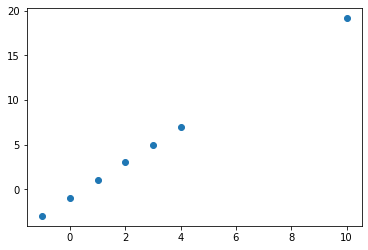

In [1]:
'''
Q1
'''

# Given this data, train a neural network to match the xs to the ys
# So that a predictor for a new value of X will give a float value
# very close to the desired answer
# i.e. print(model.predict([10.0])) would give a satisfactory result
# The test infrastructure expects a trained model that accepts
# an input shape of [1]
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import pandas as pd
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt


def solution_model():
    xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
    ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

    # plt.scatter(xs, ys);
    # plt.show()
    # Create features (using tensors)
    xs = tf.constant(xs)

    # Create labels (using tensors)
    ys = tf.constant(ys)

    # Set random seed
    tf.random.set_seed(42)


    # Replicate model_1 and add an extra layer
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1),
        tf.keras.layers.Dense(1)  # add a second layer
    ])

    # Compile the model
    model.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.SGD(),
                    metrics=['mae'])

    # Fit the model
    model.fit(tf.expand_dims(xs, axis=-1), ys, epochs=100, verbose=1)  # set verbose to 0 for less output


    # YOUR CODE HERE
    return model

# Note that you'll need to save your model as a .h5 like this.
# When you press the Submit and Test button, your saved .h5 model will
# be sent to the testing infrastructure for scoring
# and the score will be returned to you.
if __name__ == '__main__':
    model = solution_model()
    end_val = model.predict([10.0])[0]

    print(end_val)

    xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 10.0], dtype=float)
    ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0, end_val], dtype=float)

    plt.scatter(xs, ys);
    plt.show()



    model.save("model_q1.h5")



In [2]:
'''
Q2
'''

#
# Create a classifier for the Fashion MNIST dataset
# Note that the test will expect it to classify 10 classes and that the
# input shape should be the native size of the Fashion MNIST dataset which is
# 28x28 monochrome. Do not resize the data. Your input layer should accept
# (28,28) as the input shape only. If you amend this, the tests will fail.
#

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, MaxPooling2D
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam, SGD

def solution_model():
    fashion_mnist = tf.keras.datasets.fashion_mnist

    # fasion_mnist_classes = {
    #     0: T-shirt/top
    #     1: Trouser
    #     2: Pullover
    #     3: Dress
    #     4: Coat
    #     5: Sandal
    #     6: Shirt
    #     7: Sneaker
    #     8: Bag
    #     9: Ankle boot
    # }

    # load dataset
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    train_images = train_images / 255.0
    test_images = test_images / 255.0

    # Set random seed
    tf.random.set_seed(42)

    # Create the model
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),  # input layer (we had to reshape 28x28 to 784)
        tf.keras.layers.Dense(10, activation="softplus"),
        tf.keras.layers.Dense(10, activation="softplus"),
        tf.keras.layers.Dense(10, activation="softplus"),
        tf.keras.layers.Dense(10, activation="softplus"),
        tf.keras.layers.Dense(10, activation="softmax")  # output shape is 10, activation is softmax
    ])

    # Compile the model
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(lr=0.002),  # ideal learning rate (same as default)
                    metrics=["accuracy"])

    # Fit the model
    history_5 = model.fit(train_images,
                            train_labels,
                            epochs=50,
                            validation_data=(test_images, test_labels))
    # YOUR CODE HERE
    model.evaluate(test_images)

    return model


# Note that you'll need to save your model as a .h5 like this.
# When you press the Submit and Test button, your saved .h5 model will
# be sent to the testing infrastructure for scoring
# and the score will be returned to you.
if __name__ == '__main__':
    model = solution_model()

    model.save("model_q2.h5")


4422102/4422102 [==============================] - 0s 0us/step


Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8093 - accuracy: 0.7222 - val_loss: 0.5667 - val_accuracy: 0.8074
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5106 - accuracy: 0.8252 - val_loss: 0.5177 - val_accuracy: 0.8185
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4563 - accuracy: 0.8409 - val_loss: 0.4818 - val_accuracy: 0.8280
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4305 - accuracy: 0.8508 - val_loss: 0.4644 - val_accuracy: 0.8392
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4132 - accuracy: 0.8560 - val_loss: 0.4734 - val_accuracy: 0.8319
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3994 - accuracy: 0.8587 - val_loss: 0.4671 - val_accuracy: 0.8320
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3901 - accuracy: 0.8619 - val_loss: 0.4485 - val_accuracy:

In [4]:
'''
Q3
'''
#
# Build a classifier for Rock-Paper-Scissors based on the rock_paper_scissors
# TensorFlow dataset.
#
# IMPORTANT: Your final layer should be as shown. Do not change the
# provided code, or the tests may fail
#
# IMPORTANT: Images will be tested as 150x150 with 3 bytes of color depth
# So ensure that your input layer is designed accordingly, or the tests
# may fail.
#
# NOTE THAT THIS IS UNLABELLED DATA.
# You can use the ImageDataGenerator to automatically label it
# and we have provided some starter code.


import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import urllib.request
import zipfile
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
# from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np


# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

# images must be saved sub folders of their class
def get_images_labels(target_dir, class_names, resize=None):
  # Setup target directory (we'll view images from here)
  labels = []
  imgs = []
  for idx, class_dir in enumerate(class_names):
    target_folder = target_dir+class_dir

    for img_file in os.listdir(target_folder):
      img = cv2.imread(target_folder + "/" + img_file)
      if resize: img = cv2.resize(img, resize)
      imgs.append(img)

      labels.append(idx)

  return (np.array(imgs), np.array(labels))


# will split images and labels into training and test (or validation) data
# images must be array length N x w x h x 3.
# labels must be Nx1 (sparse) or Nxdepth (not sparse)
# All images and labels must be in synchronous.
# There must be same number images for each label.
# All images must be ordered by label, where all images from first label come first, then
# all images from second label come second, and so on
# depth is number of classes
# split must be split size; data will be shuffled prior to split
def images_labels_split(imgs, lbls, depth, split=.2):
    train_imgs = []
    train_lbls = []

    test_imgs = []
    test_lbls = []

    N = len(imgs)

    if N != len(lbls): raise Exception

    # size of images for each label
    n = int(N / depth)

    for k in range(depth):

        inds = np.linspace(0, n - 1, n)
        np.random.shuffle(inds)

        ind_split = n - int(n * split)
        train_inds = inds[:ind_split]
        test_inds = inds[ind_split:]

        for train_ind in train_inds:
            train_ind = int(train_ind + k * n)
            train_imgs.append(imgs[train_ind])
            train_lbls.append(lbls[train_ind])

        for test_ind in test_inds:
            test_ind = int(test_ind + k * n)
            test_imgs.append(imgs[test_ind])
            test_lbls.append(lbls[test_ind])

    return (np.array(train_imgs), np.array(train_lbls), np.array(test_imgs), np.array(test_lbls))





def solution_model():


    url = 'https://storage.googleapis.com/download.tensorflow.org/data/rps.zip'
    urllib.request.urlretrieve(url, 'rps.zip')
    local_zip = 'rps.zip'
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    zip_ref.extractall('tmp/')
    zip_ref.close()

    class_names = ['rock', 'paper', 'scissors']
    parent_dir = r'/content/tmp/rps/'

    (X, Y) = get_images_labels(parent_dir, class_names, resize=(150, 150))

    Y = tf.one_hot(Y, 3)

    X_train, Y_train, X_test, Y_test = images_labels_split(X, Y, depth=3, split=.2)

    datagen = ImageDataGenerator(rescale=1 / 255.)
    train_data = datagen.flow(X_train, Y_train, batch_size=32, seed=42)
    test_data = datagen.flow(X_test, Y_test, batch_size=32, seed=42)

    # Create augmented data generator instance
    train_datagen_augmented = ImageDataGenerator(rescale=1 / 255.,
                                                 rotation_range=20,  # note: this is an int not a float
                                                 width_shift_range=0.2,
                                                 height_shift_range=0.2,
                                                 zoom_range=0.2,
                                                 horizontal_flip=True)

    train_data_augmented = train_datagen_augmented.flow(X_train, Y_train, batch_size=32, seed=42)

    model = Sequential([
        Conv2D(10, 3, activation='relu', input_shape=(150, 150, 3)),
        MaxPool2D(),
        Conv2D(10, 3, activation='relu'),
        MaxPool2D(),
        Flatten(),
        Dense(3, activation='softmax')
    ])

    # Compile the cloned model (same setup as used for model_10)
    model.compile(loss="categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

    # Fit the model
    history = model.fit(train_data_augmented,  # use augmented data
                        epochs=20,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))


    return model






# Note that you'll need to save your model as a .h5 like this.
# When you press the Submit and Test button, your saved .h5 model will
# be sent to the testing infrastructure for scoring
# and the score will be returned to you.
if __name__ == '__main__':

    model = solution_model()
    model.save("model_q3.h5")


Epoch 1/20
63/63 [==============================] - 24s 374ms/step - loss: 1.1568 - accuracy: 0.3785 - val_loss: 1.0201 - val_accuracy: 0.3929
Epoch 2/20
63/63 [==============================] - 25s 401ms/step - loss: 0.9832 - accuracy: 0.4950 - val_loss: 0.7527 - val_accuracy: 0.7798
Epoch 3/20
63/63 [==============================] - 24s 384ms/step - loss: 0.8104 - accuracy: 0.6538 - val_loss: 0.6591 - val_accuracy: 0.6766
Epoch 4/20
63/63 [==============================] - 25s 399ms/step - loss: 0.6721 - accuracy: 0.7014 - val_loss: 0.3712 - val_accuracy: 0.9385
Epoch 5/20
63/63 [==============================] - 23s 371ms/step - loss: 0.5540 - accuracy: 0.7837 - val_loss: 0.3813 - val_accuracy: 0.8393
Epoch 6/20
63/63 [==============================] - 24s 386ms/step - loss: 0.5416 - accuracy: 0.7857 - val_loss: 0.3420 - val_accuracy: 0.8730
Epoch 7/20
63/63 [==============================] - 24s 385ms/step - loss: 0.5037 - accuracy: 0.7922 - val_loss: 0.4088 - val_accuracy: 0.8532